In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import nltk
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('wordnet')

nltk.download('omw-1.4')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob
import re 
import numpy as np


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
#Load dataset
import pandas as pd

data=pd.read_csv('/content/Elon_musk.csv',encoding='Latin-1')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
#number of words in single tweet
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].head()


,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [5]:
#number of characters in tweet
data['char_count']=data['Text'].str.len()
data[['Text','char_count']].head()


,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


In [6]:
#number of stopwords
stop=stopwords.words('english')

data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Text','stopwords']].head()


,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


In [7]:
#Number of special characters
data['hastags'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data[['Text','hastags']].head()

,Text,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


In [8]:
#number of upper case
data['upper'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Text','upper']].head()

,Text,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [9]:
#number of Numeric
data['numerics'] = data['Text'].apply(lambda x:len([x for x in x.split() if x.isdigit()]))
data[['Text','numerics']].head()

,Text,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


Pre-processing

In [10]:
#convert data in lower case
data['Text'] =data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Text'].head()



0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

In [11]:
#Removing punctuation
data['Text']=data['Text'].str.replace('[^\w\s]',' ')
data['Text'].head()

<ipython-input-11-e374c9b83732>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text']=data['Text'].str.replace('[^\w\s]',' ')


0                                kunalb11 i m an alien
1     id_aa_carmack ray tracing on cyberpunk with h...
2                   joerogan  spotify great interview 
3                       gtera27 doge is underestimated
4     teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

In [12]:
#Remove stop words
stop=stopwords.words('english')

data['Text'] = data['Text'].apply(lambda x:' '. join([x for x in x.split() if x  not in stop]))
data['Text'].head()

0                                       kunalb11 alien
1    id_aa_carmack ray tracing cyberpunk hdr next l...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

In [13]:
#Removal of common words
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:10]
freq

co                657
https             655
u                 319
spacex            250
amp               219
tesla             169
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
dtype: int64

In [14]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                       kunalb11 alien
1    id_aa_carmack ray tracing cyberpunk hdr next l...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [15]:
#remove rear words
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-10:]
freq

joeingeneral    1
andrewbogut     1
typical         1
unusual         1
24              1
bogus           1
cam             1
z2v15u7zcf      1
disk            1
altho           1
dtype: int64

In [16]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                       kunalb11 alien
1    id_aa_carmack ray tracing cyberpunk hdr next l...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [17]:
#Tokanization
TextBlob(data['Text'][1]).words

WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next', 'level', 'tried'])

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
#Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


0                                       kunalb11 alien
1    id_aa_carmack ray trace cyberpunk hdr next lev...
2                     joerogan spotifi great interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

In [20]:
#Lemmatization

from textblob import Word

data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Text'].head()

0                                       kunalb11 alien
1    id_aa_carmack ray tracing cyberpunk hdr next l...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

In [22]:
#N-grams
TextBlob(data['Text'][0]).ngrams(2)

[WordList(['kunalb11', 'alien'])]

Term Frequency

In [23]:
tf1 = (data['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,id_aa_carmack,1
1,ray,1
2,tracing,1
3,cyberpunk,1
4,hdr,1
5,next,1
6,level,1
7,tried,1


Inverse Document Frequency

In [27]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Text'].str.contains(word)])))

tf1

,words,tf,idf
0,id_aa_carmack,1,4.166415
1,ray,1,5.035453
2,tracing,1,7.600402
3,cyberpunk,1,5.115496
4,hdr,1,6.907255
5,next,1,3.936841
6,level,1,5.297817
7,tried,1,5.808643


TF-IDF

In [28]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,id_aa_carmack,1,4.166415,4.166415
1,ray,1,5.035453,5.035453
2,tracing,1,7.600402,7.600402
3,cyberpunk,1,5.115496,5.115496
4,hdr,1,6.907255,6.907255
5,next,1,3.936841,3.936841
6,level,1,5.297817,5.297817
7,tried,1,5.808643,5.808643


Bag of words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(data['Text'])
vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7673 stored elements in Compressed Sparse Row format>

Sentimental Analysis

In [29]:
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Text','sentiment']].head()

,Text,sentiment
0,kunalb11 alien,-0.25
1,id_aa_carmack ray tracing cyberpunk hdr next l...,0.00
2,joerogan spotify great interview,0.80
3,gtera27 doge underestimated,0.00
4,teslacn congratulation china amazing execution...,0.20


In [50]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [51]:
stop= STOPWORDS

In [52]:
data['Text']

0                                          kunalb11 alien
1       id_aa_carmack ray tracing cyberpunk hdr next l...
2                        joerogan spotify great interview
3                             gtera27 doge underestimated
4       teslacn congratulation china amazing execution...
                              ...                        
1994    true sound surreal negative propaganda still e...
1995     make sure read ur term condition clicking accept
1996                             teslagong samwise gamgee
1997                        dumb dumber 0001f525 0001f525
1998                            progress update august 28
Name: Text, Length: 1999, dtype: object

In [53]:
#joinng all sentences of data
txt = ' '.join(data['Text']) # with space join all sentences in x
txt

'kunalb11 alien id_aa_carmack ray tracing cyberpunk hdr next level tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulation china amazing execution last year next even happy new year ox 9wfkmyu2oj frodo underdoge thought would fail zgxjfdzzrm owensparks_ anonyx10 haha thanks anonyx10 indeed tweet definitely represent real world time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest 3rwe9uhsts geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler joshmanmode definitely issue sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy 0001f923 0001f923 true power haha fc9uhqsd7o freewalletorg crypto wallet give private key avoided cost freewalletorg app suck nasa selected falcon heavy launch first two element lunar gateway together one mission 3pwt ajtourville yes blkmdl3 rationaletienne adamklotz_ predict cash flow reasonably well starlink ipo rationaletienne

In [54]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

A word cloud is visualization technique for text data where the most frequent word is shown in biggest font size

In [55]:
stop= STOPWORDS

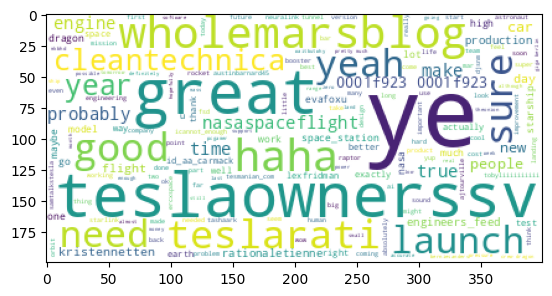

In [57]:
wc = WordCloud(background_color='white',stopwords=stop).generate(txt)
plt.imshow(wc)
# bigger the name of word more the frequency of that word in that corpus
# font of apple, laptop is huge i.e. it is occuring many times in text
# word cloud is important when we are analysing the data when we build Naive bias text classification.
# This is how we can create word cloud